In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from prepare import prepare_data
from visualize_clf import visualize_clf
from sklearn.neighbors import KNeighborsClassifier


**Loading the dataset**

In [13]:
dataset = pd.read_csv('virus_data.csv')

In [14]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(dataset, test_size = 0.2, train_size=0.8, random_state=126)

**Preparing the data**

In [15]:
# Prepare training set according to itself
train_df_prepared = prepare_data(train_df, train_df)

# Prepare test set according to the raw training set
test_df_prepared = prepare_data(train_df, test_df)


# # Save the preprocessed DataFrames as CSV files
train_df_prepared.to_csv('train_df_prepared.csv', index=False)
test_df_prepared.to_csv('test_df_prepared.csv', index=False)
train_df.to_csv('train_df.csv', index=False)



**Part 1: Basic model selection with k-Nearest Neighbors**

**Q1**

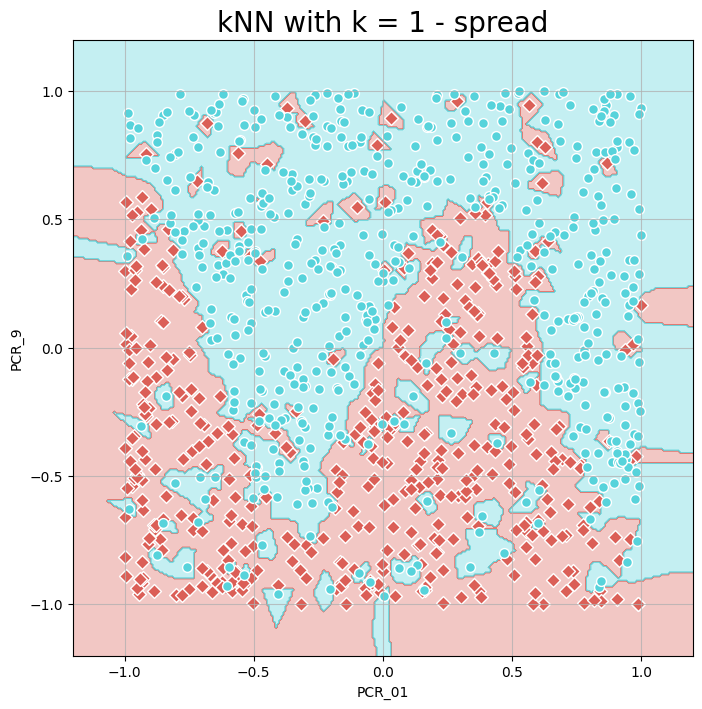

In [16]:
temp_train_df_prepared = train_df_prepared[['PCR_01', 'PCR_09']].values
temp_labels = train_df_prepared.spread.values
knn_inst_1 = KNeighborsClassifier(n_neighbors = 1)
x = temp_train_df_prepared
y = temp_labels
knn_inst_1.fit(x,y)
visualize_clf(knn_inst_1, x, y, "kNN with k = 1 - spread", "PCR_01", "PCR_9" )

**Q2**

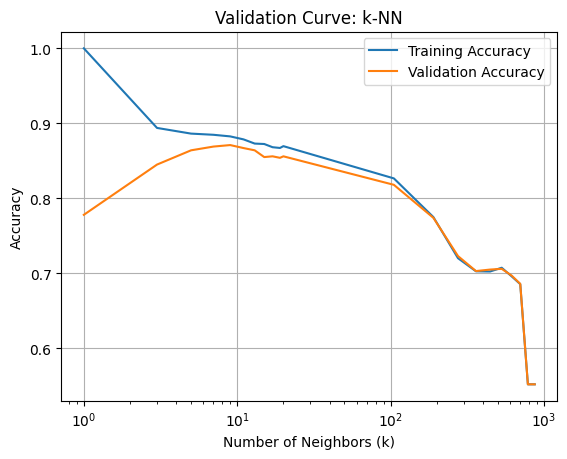

Best k value: 9
Mean training accuracy: 0.8825714285714286
Mean validation accuracy: 0.871


In [17]:
from sklearn.model_selection import cross_validate

# Define the k values to try
k_values = list(range(1, 20, 2)) + list(range(20, 871, 85))

# Lists to store mean training and validation accuracies for each k value
train_accuracies = []
val_accuracies = []

# Perform cross-validation for each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn, x, y, cv=8, scoring='accuracy', return_train_score=True)
    train_acc = np.mean(scores['train_score'])
    val_acc = np.mean(scores['test_score'])
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

# Plot the validation curve
plt.figure()
plt.semilogx(k_values, train_accuracies, label='Training Accuracy')
plt.semilogx(k_values, val_accuracies, label='Validation Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Validation Curve: k-NN')
plt.legend()
plt.grid(True)
##plt.savefig('validation_curve.png')
plt.show()

best_k = k_values[np.argmax(val_accuracies)]
best_train_accuracy = train_accuracies[np.argmax(val_accuracies)]
best_val_accuracy = np.max(val_accuracies)

print("Best k value:", best_k)
print("Mean training accuracy:", best_train_accuracy)
print("Mean validation accuracy:", best_val_accuracy)

**Q3+4**

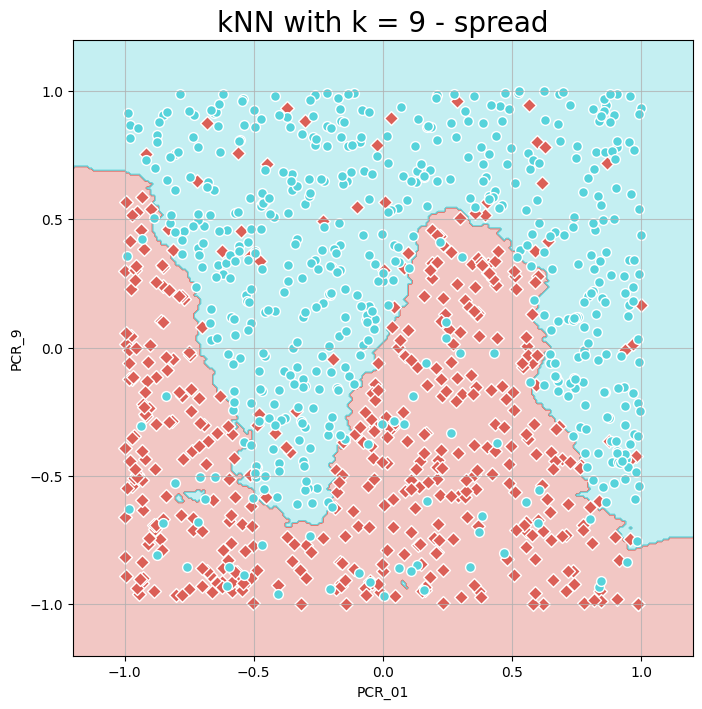

In [18]:
knn_inst_9 = KNeighborsClassifier(n_neighbors = 9)
x = temp_train_df_prepared
y = temp_labels
knn_inst_9.fit(x,y)
visualize_clf(knn_inst_9, x, y, "kNN with k = 9 - spread", "PCR_01", "PCR_9" )

**Q5**

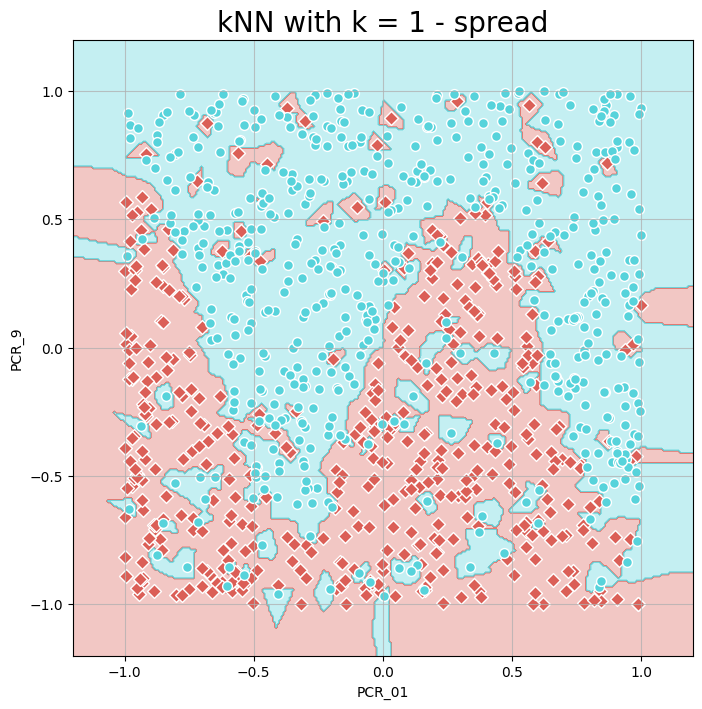

In [19]:
knn_inst_1 = KNeighborsClassifier(n_neighbors = 1)
x = temp_train_df_prepared
y = temp_labels
knn_inst_1.fit(x,y)
visualize_clf(knn_inst_1, x, y, "kNN with k = 1 - spread", "PCR_01", "PCR_9" )

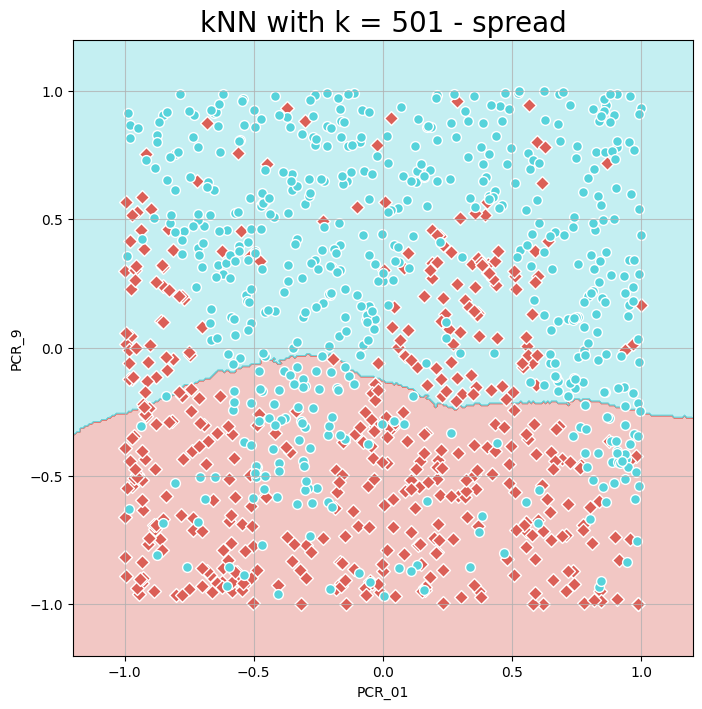

In [20]:
knn_inst_501 = KNeighborsClassifier(n_neighbors = 501)
x = temp_train_df_prepared
y = temp_labels
knn_inst_501.fit(x,y)
visualize_clf(knn_inst_501, x, y, "kNN with k = 501 - spread", "PCR_01", "PCR_9" )

**Q6**

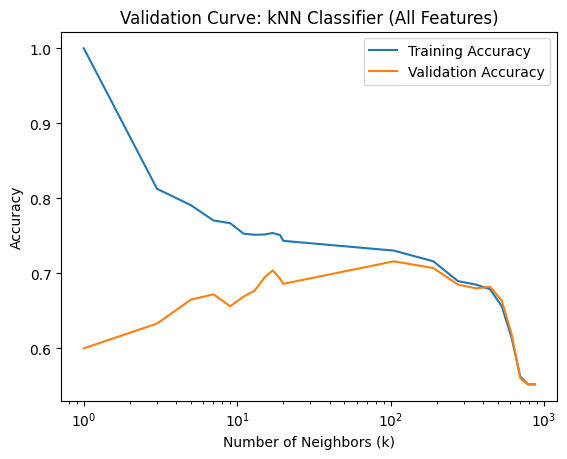

Best k value: 105
Mean Training Accuracy: 0.7302857142857142
Mean Validation Accuracy: 0.716


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder

# Extract the features and labels
X_train = train_df_prepared.drop(['spread', 'risk'], axis=1)
Y_train = train_df_prepared['spread']

# Define the range of k values
k_values = list(range(1, 20, 2)) + list(range(20, 871, 85))

# Perform cross-validation and collect the training and validation scores
train_scores = []
val_scores = []

for k in k_values:
    knn_inst = KNeighborsClassifier(n_neighbors=k)
    cv_results = cross_validate(knn_inst, X_train, Y_train, cv=8, scoring='accuracy', return_train_score=True)
    train_scores.append(np.mean(cv_results['train_score']))
    val_scores.append(np.mean(cv_results['test_score']))

# Plot the validation curve
plt.figure()
plt.semilogx(k_values, train_scores, label='Training Accuracy')
plt.semilogx(k_values, val_scores, label='Validation Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Validation Curve: kNN Classifier (All Features)")
plt.show()

# Determine the best k value
best_k_index = np.argmax(val_scores)
best_k = k_values[best_k_index]
best_train_accuracy = train_scores[best_k_index]
best_val_accuracy = val_scores[best_k_index]

# Print the results
print("Best k value:", best_k)
print("Mean Training Accuracy:", best_train_accuracy)
print("Mean Validation Accuracy:", best_val_accuracy)


**Part 2: Decision trees**

**Q7**

Training Accuracy: 0.735


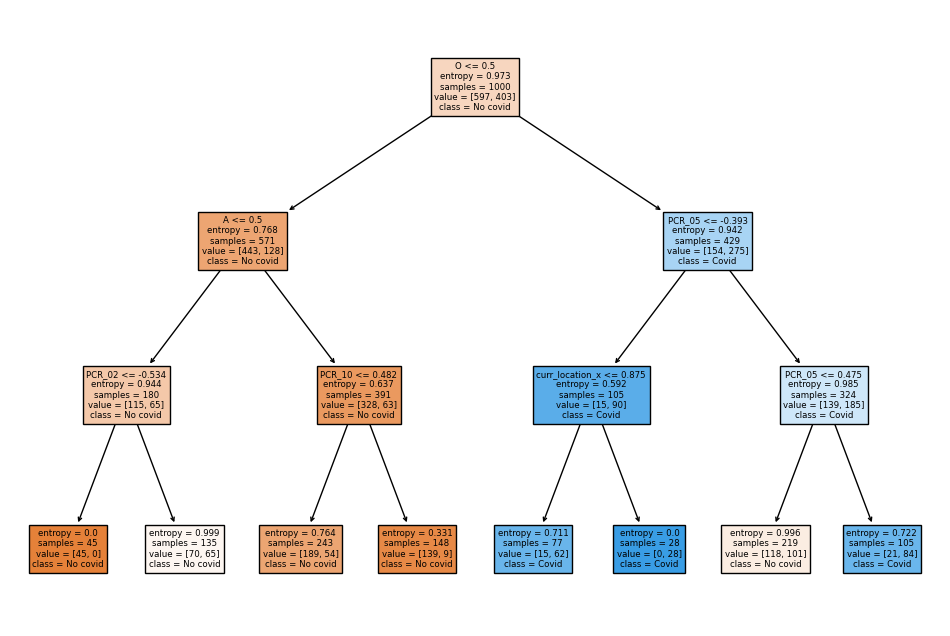

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt


X_train = train_df_prepared.drop(['spread', 'risk'], axis=1)
Y_train = train_df_prepared['risk']
# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Train Decision Tree classifier
clf.fit(X_train, Y_train)

# Calculate training accuracy
training_accuracy = clf.score(X_train, Y_train)
print("Training Accuracy:", training_accuracy)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X_train.columns, class_names=['No covid', 'Covid'], filled=True)
plt.show()


**Q8**

Text(0.5, 1.0, 'Mean Training Accuracy')

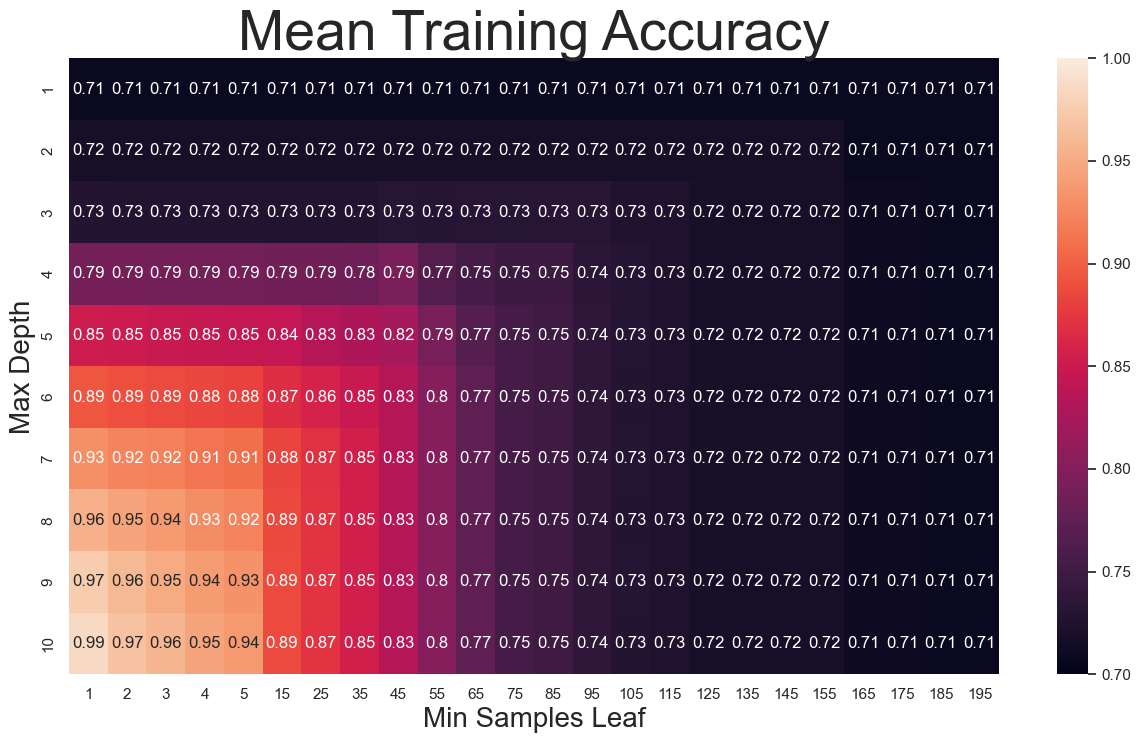

In [41]:
from sklearn.model_selection import GridSearchCV
from copy import copy


#Creating a temporary dataframe for training
temp_train = copy(train_df_prepared)
temp_train.drop('risk' , axis = 1 , inplace = True)
temp_train.drop('spread' , axis = 1 , inplace = True)
temp_labels = copy(train_df_prepared.risk.values)

max_depths = list(range(1,11,1))
min_samples = list(range(1,5,1)) + list(range(5,200,10))
params = {"criterion" : ["entropy"], "max_depth" : max_depths, "min_samples_leaf" : min_samples}
tree = DecisionTreeClassifier()

#Creating and fitting the grid search model
clf = GridSearchCV(estimator = tree, param_grid = params, cv = 8, return_train_score = True)
clf.fit(temp_train, temp_labels)

validation_means = clf.cv_results_["mean_test_score"]
training_means = clf.cv_results_["mean_train_score"]


#Plotting heatmaps
plt = sns.heatmap(training_means.reshape(len(max_depths), len(min_samples)), vmin = 0.7, vmax = 1, \
                  xticklabels = min_samples, yticklabels = max_depths, annot = True, cbar = True)
plt.set_xlabel('Min Samples Leaf', fontsize = 20)
plt.set_ylabel('Max Depth', fontsize = 20)
plt.set_title('Mean Training Accuracy', fontsize = 40)





Text(0.5, 1.0, 'Mean Validation Accuracy')

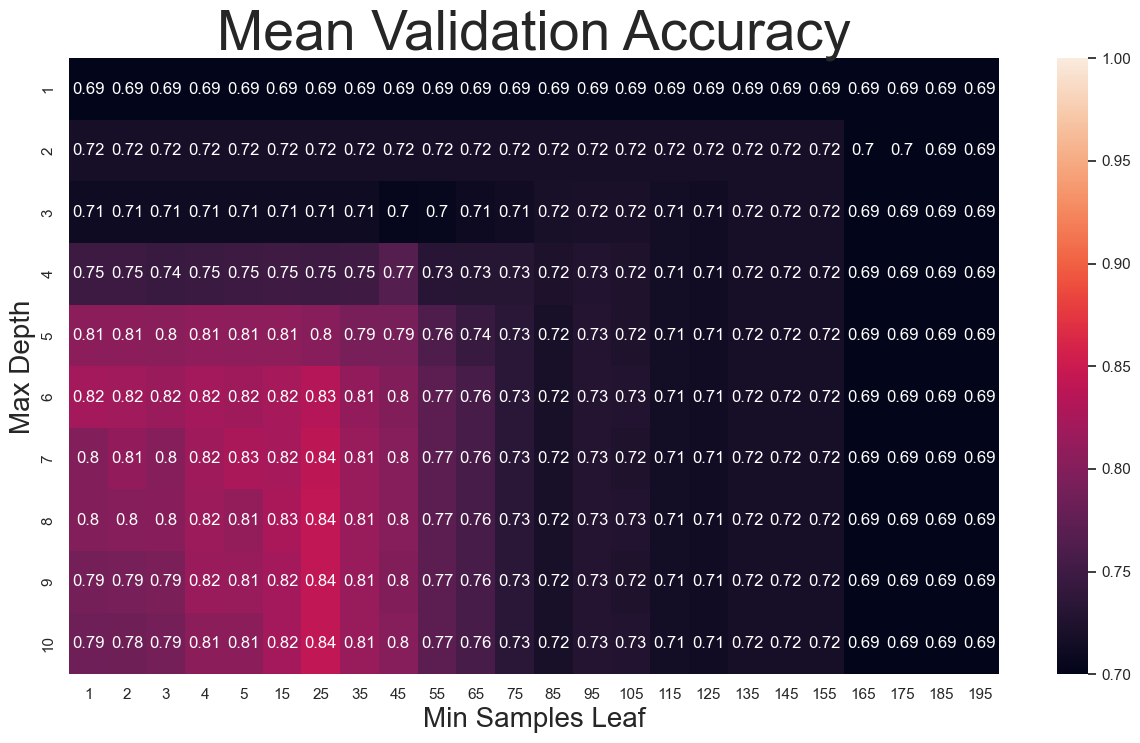

In [42]:

sns.set(rc = {'figure.figsize':(15,8)})
plt = sns.heatmap(validation_means.reshape(len(max_depths), len(min_samples)), vmin = 0.7, vmax = 1, \
                  xticklabels = min_samples, yticklabels = max_depths, annot = True, cbar = True)
plt.set_xlabel('Min Samples Leaf', fontsize = 20)
plt.set_ylabel('Max Depth', fontsize = 20)
plt.set_title('Mean Validation Accuracy', fontsize = 40)




In [43]:
print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 25}


**Q9**

In [50]:
X_train = copy(train_df_prepared).drop(columns=['risk', 'spread'])
Y_train = copy(train_df_prepared).risk
X_test = copy(test_df_prepared).drop(columns=['risk',  'spread'])
Y_test = copy(test_df_prepared).risk

# Create Decision Tree classifer object with the optimal hyperparameters
clf = DecisionTreeClassifier(criterion='entropy',
                             max_depth = 8, min_samples_leaf = 25)

# Train Decision Tree Classifer
classifier = clf.fit(X=X_train, y=Y_train)

print("Test score for this model is "+ str(clf.score(X_test, Y_test)))

Test score for this model is 0.884
